In [11]:
import numpy as np
import matplotlib.pyplot as plt

from Bandit import Bandit
from Agent import Agent

Recompensa acumulada:  909.0


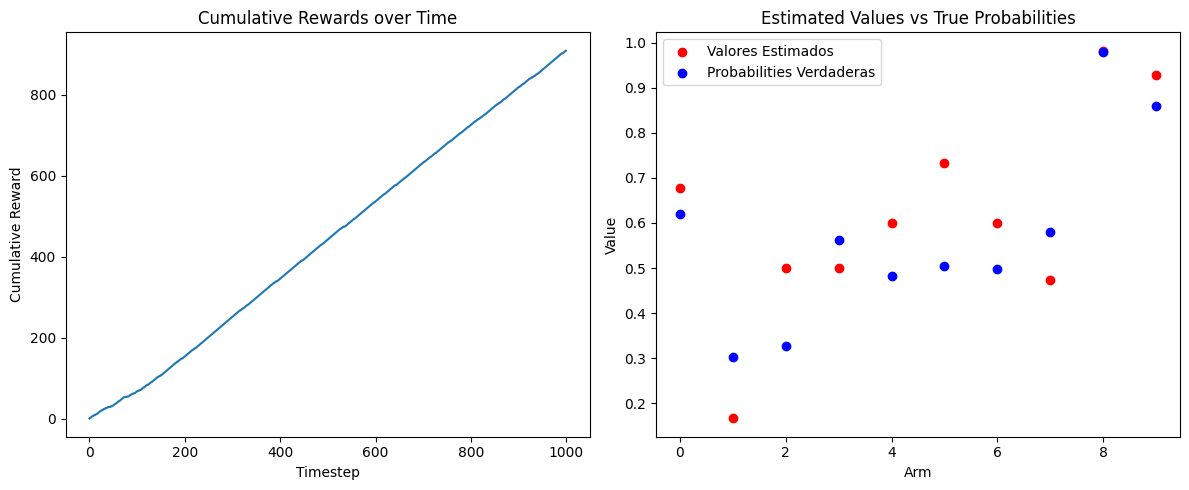

In [13]:
# Simulación
n = 1000

bandit = Bandit()
agent = Agent(epsilon=0.1, n_arms=bandit.n_arms)

rewards = np.zeros(n)
cumulative_rewards = np.zeros(n)
total_reward = 0

for i in range(n):
    arm = agent.select_arm()
    reward = bandit.pull(arm)
    agent.update_estimates(arm, reward)

    rewards[i] = reward
    total_reward += reward
    cumulative_rewards[i] = total_reward

print("Recompensa acumulada: ", rewards.sum())

# Gráficas
plt.figure(figsize=(12, 5))

# Gráfica de las recompensas acumuladas
plt.subplot(1, 2, 1)
plt.plot(cumulative_rewards)
plt.xlabel('Timestep')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards over Time')

# Gráfica de los valores estimados vs probabilidades reales
plt.subplot(1, 2, 2)
plt.scatter(range(bandit.n_arms), agent.rewards, label='Valores Estimados', color='red')
plt.scatter(range(bandit.n_arms), bandit.arms_probabilities, label='Probabilities Verdaderas', color='blue')
plt.xlabel('Arm')
plt.ylabel('Value')
plt.title('Estimated Values vs True Probabilities')
plt.legend()

plt.tight_layout()
plt.show()